__поиск объекта на изображении по шаблону__

Евгений Борисов borisov.e@solarl.ru

In [6]:
import numpy as np
import cv2
from scipy.ndimage import maximum_filter
from matplotlib import pyplot as plt

In [7]:
print('OpenCV ',cv2.__version__)

OpenCV  4.5.1


In [8]:
# !python -m pip install --upgrade pip

In [9]:
# !pip install opencv-python

In [10]:
def find_templ( img, img_tpl ):
    # размер шаблона
    h,w = img_tpl.shape

    # строим карту совпадений с шаблоном
    match_map = cv2.matchTemplate( img, img_tpl, cv2.TM_CCOEFF_NORMED)

    max_match_map = np.max(match_map) # значение карты для области максимально близкой к шаблону
    print(max_match_map)
    if(max_match_map < 0.71): # совпадения не обнаружены 
        return []

    a = 0.7 # коэффициент "похожести", 0 - все, 1 - точное совпадение 

    # отрезаем карту по порогу 
    match_map = (match_map >= max_match_map * a  ) * match_map  

    # выделяем на карте локальные максимумы
    match_map_max = maximum_filter(match_map, size=min(w,h) ) 
    # т.е. области наиболее близкие к шаблону
    match_map = np.where( (match_map==match_map_max), match_map, 0) 

    # координаты локальных максимумов
    ii = np.nonzero(match_map)
    rr = tuple(zip(*ii))

    res = [ [ c[1], c[0], w, h ] for c in rr ]
   
    return res

In [11]:
# рисуем рамки найденных совпадений
def draw_frames(img,coord):
    res = img.copy()
    for c in coord:
        top_left = (c[0],c[1])
        bottom_right = (c[0] + c[2], c[1] + c[3])
        cv2.rectangle(res, top_left, bottom_right, color=(0,0,255), thickness=5 )
    return res 

In [13]:
!ls ../data/template-matcher/templates/

dar-kub.png  j7-org.png  lub-ana2.png  ok-bel.png  sad2.png
dobry.png    j7-zel.png  lub-ana.png   ri-bel.png  sem-zel.png
dob-zel.png  ja-che.png  lub-kr.png    sad1.png


In [14]:
test_image_file = '../data/template-matcher/test.jpg'
temlplate_image_file = '../data/template-matcher/templates/dobry.png'

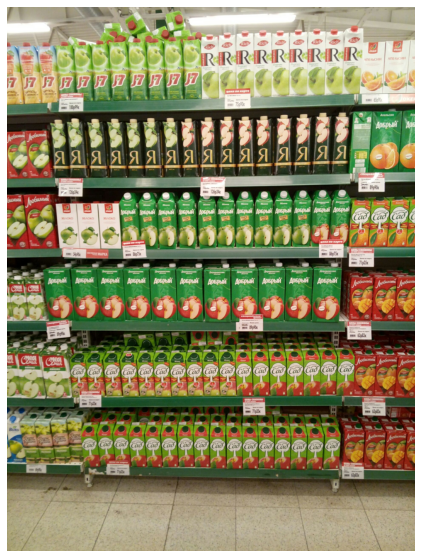

In [15]:
plt.figure(figsize=(10,10))
plt.axis(False)
plt.imshow(cv2.cvtColor(cv2.imread(test_image_file),cv2.COLOR_BGR2RGB))

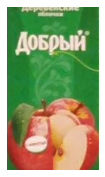

In [16]:
plt.figure(figsize=(3,3))
plt.axis(False)
plt.imshow(cv2.cvtColor(cv2.imread(temlplate_image_file),cv2.COLOR_BGR2RGB))

In [17]:
test_image = cv2.imread(test_image_file,cv2.IMREAD_GRAYSCALE)

temlplate_image = cv2.imread(temlplate_image_file,cv2.IMREAD_GRAYSCALE)

coord = find_templ( test_image, temlplate_image )
test_image_mark =  cv2.cvtColor(test_image, cv2.COLOR_GRAY2BGR) 
test_image_mark = draw_frames(test_image_mark,coord)

0.9999329


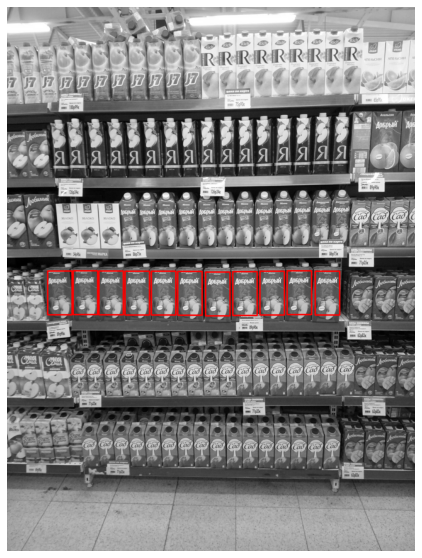

In [18]:
plt.figure(figsize=(10,10))
plt.axis(False)
plt.imshow(cv2.cvtColor(test_image_mark,cv2.COLOR_BGR2RGB) )